In [140]:
import pandas as pd
import numpy as np

from datetime import datetime
from vega_datasets import data

import matplotlib.pyplot as plt
import seaborn as sns


### 1st Data Set

In [3]:
df=data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


Use the above dataset for the following exercises:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [9]:
df=df.set_index('date').sort_index()

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [11]:
df_daily=df.resample('D').mean()
df_daily.head(3)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667


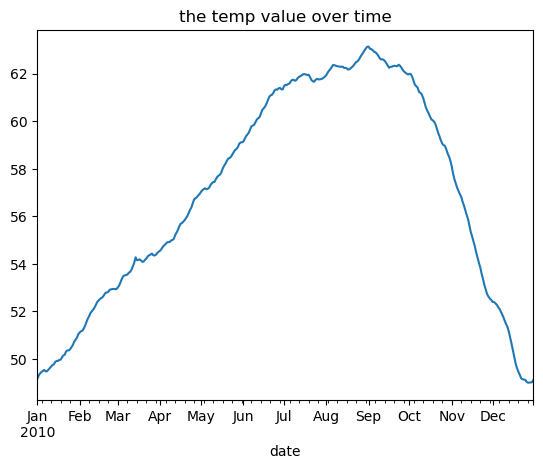

In [14]:
df_daily.temp.plot()
plt.title('the temp value over time')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.
### 3. Write the code necessary to visualize the maximum temperature over time.

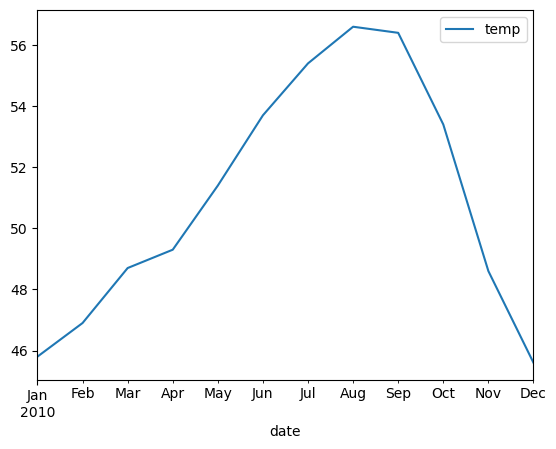

In [28]:
df.resample('M').min().plot()
plt.show()

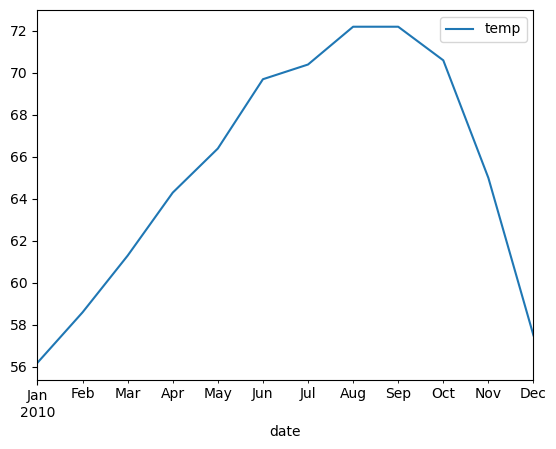

In [29]:
df.resample('M').max().plot()
plt.show()

### 4. Which month is the coldest, on average?
- Jan
### 5. Which month has the highest average temperature?
- Aug, Sept

In [25]:
df.resample('M').agg(['min','max'])


temp      
             min   max
date                  
2010-01-31  45.8  56.2
2010-02-28  46.9  58.6
2010-03-31  48.7  61.3
2010-04-30  49.3  64.3
2010-05-31  51.4  66.4
2010-06-30  53.7  69.7
2010-07-31  55.4  70.4
2010-08-31  56.6  72.2
2010-09-30  56.4  72.2
2010-10-31  53.4  70.6
2010-11-30  48.6  65.0
2010-12-31  45.6  57.5

### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Aug , Sept

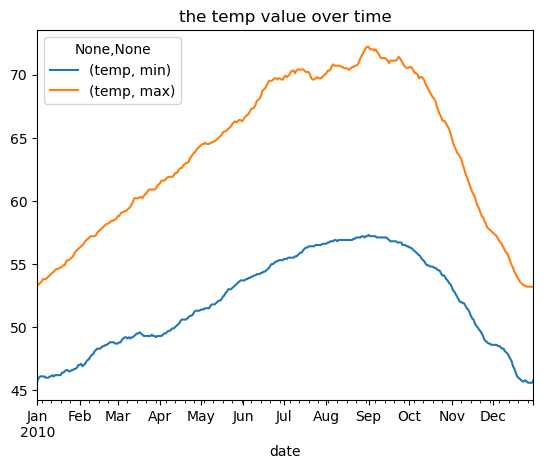

In [30]:
df.resample('D').agg(['min','max']).plot()
plt.title('the temp value over time')
plt.show()

### 7 Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

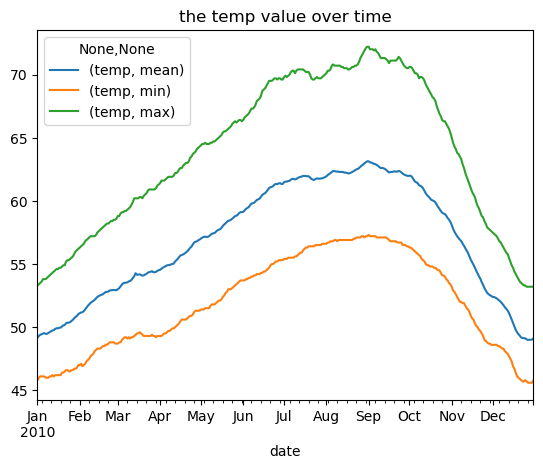

In [31]:
df.resample('D').agg(['mean','min','max']).plot()
plt.title('the temp value over time')
plt.show()

# 2 Data set:

In [193]:
df=data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Use the above dataset for the following exercises:

1. Which year and month combination has the highest amount of precipitation?
  - march 2015
  
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [207]:
df=df.set_index('date').sort_index()

In [208]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1. Which year and month combination has the highest amount of precipitation?
- march 2015

In [272]:
df['month'] = df.index.month_name()


<function matplotlib.pyplot.show(close=None, block=None)>

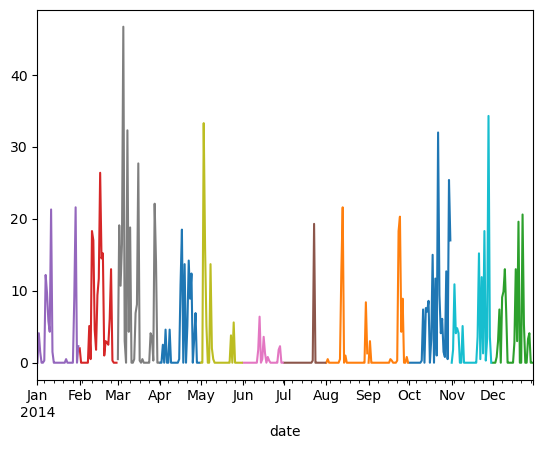

In [216]:
df14.groupby('month').precipitation.plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

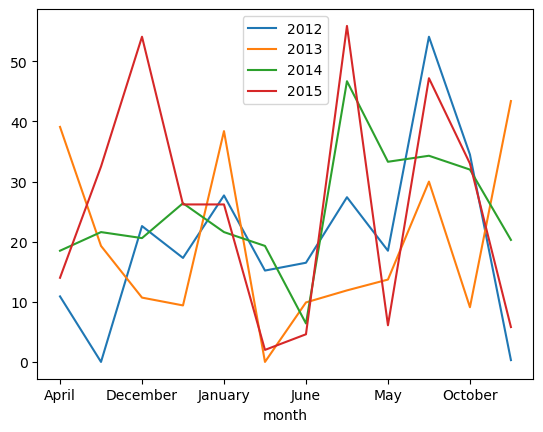

In [218]:
df12=df.loc['2012']
df13=df.loc['2013']
df14=df.loc['2014']
df15=df.loc['2015']

df12.groupby('month').precipitation.max().plot(label='2012')
df13.groupby('month').precipitation.max().plot(label='2013')
df14.groupby('month').precipitation.max().plot(label='2014')
df15.groupby('month').precipitation.max().plot(label='2015')
plt.legend()
plt.show

### 2. Visualize the amount of monthly precipitation over time.
### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
### 4. Which year-month combination is the windiest?
- December 2012

<function matplotlib.pyplot.show(close=None, block=None)>

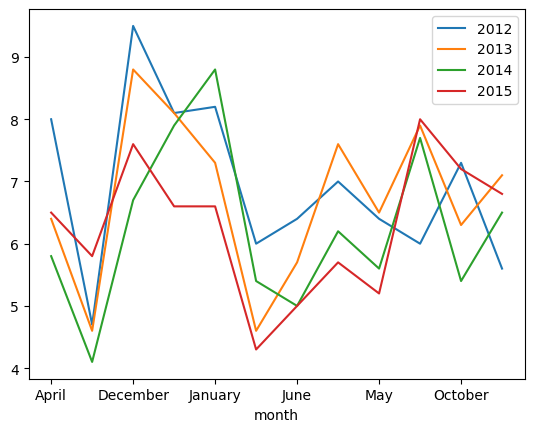

In [219]:
df12.groupby('month').wind.max().plot(label='2012')
df13.groupby('month').wind.max().plot(label='2013')
df14.groupby('month').wind.max().plot(label='2014')
df15.groupby('month').wind.max().plot(label='2015')
plt.legend()
plt.show

### 5. What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)
- 2014

In [227]:
df12[df12.weather=='sun'].shape, df13[df13.weather=='sun'].shape,df14[df14.weather=='sun'].shape,df15[df15.weather=='sun'].shape


((118, 6), (205, 6), (211, 6), (180, 6))

### 6. In which month does it rain the most?
- January, November
### 7. Which month has the most number of days with a non-zero amount of precipitation?
- February, March

In [234]:
rain=df[df.weather=='rain']
rain.groupby('month').sum()

,precipitation,temp_max,temp_min,wind
month,,,,
April,68.6,276.7,131.6,71.6
August,38.6,162.1,92.8,18.1
December,115.6,181.0,90.9,87.1
February,126.9,373.5,185.5,155.7
January,231.5,303.2,122.7,145.5
July,26.3,314.3,184.4,43.4
June,75.1,343.7,206.7,59.3
March,182.1,392.3,181.5,147.3
May,52.2,246.1,136.8,57.2


In [242]:
df['weekday'] = df.index.day_name()
rain=df[df.weather=='rain']
rain.groupby('month').sum()

,precipitation,temp_max,temp_min,wind,dayofweek
month,,,,,
April,68.6,276.7,131.6,71.6,57
August,38.6,162.1,92.8,18.1,11
December,115.6,181.0,90.9,87.1,69
February,126.9,373.5,185.5,155.7,112
January,231.5,303.2,122.7,145.5,98
July,26.3,314.3,184.4,43.4,46
June,75.1,343.7,206.7,59.3,51
March,182.1,392.3,181.5,147.3,112
May,52.2,246.1,136.8,57.2,40


# 3rd Data Set

In [293]:
df=data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


Use the above dataset for the following exercises:

1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay? - 3
3. Does the day of the week make a difference in the delay amount? - Yes
4. Does the month make a difference in the delay amount? - Yes

In [294]:
df['delay'] = df['delay'].apply(lambda x: max(0, x))


In [295]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
average_delay_by_hour = df.groupby('hour')['delay'].mean()
hour_with_highest_delay = average_delay_by_hour.idxmax()

In [296]:
hour_with_highest_delay

3

In [297]:
average_delay_by_weekday = df.groupby(df['date'].dt.dayofweek)['delay'].mean()

In [298]:
average_delay_by_weekday

date
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

In [300]:
average_delay_by_month = df.groupby(df['date'].dt.month)['delay'].mean()

In [301]:
average_delay_by_month 

date
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64